# <font color='blue' size=10><center><u>The Sparks Foundation</u></centre></font>

# <font color = "blue" size=5><u>Intership Task :- 1 </u></font>

## Prediction using Supervised ML

1) Predict the percentage of an students based on the no. of study hours.
    
- <font color = "blue" size=5><u>by Shivani Agrahari 

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

# Read Data Set

In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Shape

In [4]:
print("Data Shape i.e., Rows and columns:",data.shape)

Data Shape i.e., Rows and columns: (25, 2)


## Columns Name

In [5]:
print("Columns Name:",data.columns)

Columns Name: Index(['Hours', 'Scores'], dtype='object')


## Information of Data

In [6]:
print("Data Types:",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
Data Types: None


## Describe the Data Set i.e.,Mean,Median and Standerd Devation

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Exploratory Data Analysis (EDA)

## Find NAN Value

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

- No Null value in Data Set.

## Univariant Analysis

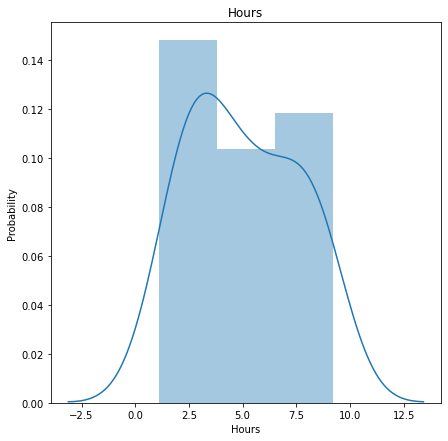

In [11]:
plt.figure(figsize=(7,7))
sns.distplot(data["Hours"])
plt.title("Hours")
plt.xlabel("Hours")
plt.ylabel("Probability")
plt.show()

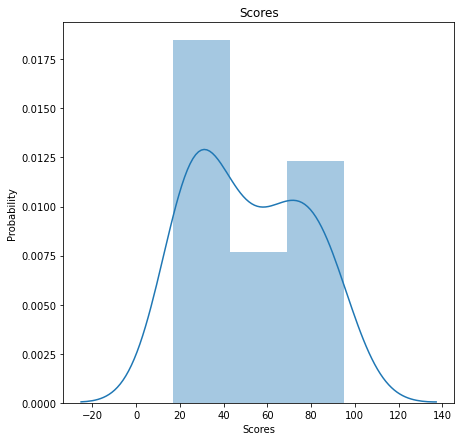

In [12]:
plt.figure(figsize=(7,7))
sns.distplot(data["Scores"])
plt.title("Scores")
plt.xlabel("Scores")
plt.ylabel("Probability")
plt.show()

## Bivariant Analysis

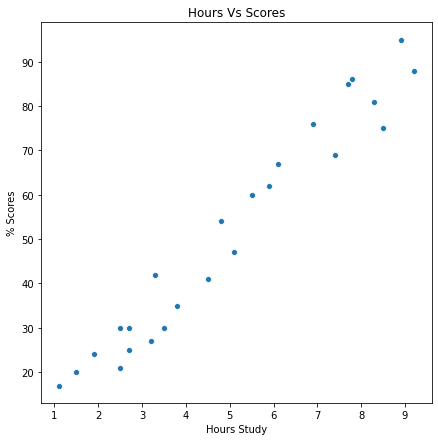

In [14]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=data["Hours"],y=data["Scores"],markers="p")
plt.title("Hours Vs Scores")
plt.xlabel("Hours Study")
plt.ylabel("% Scores")
plt.show()

## Multivariant Analysis

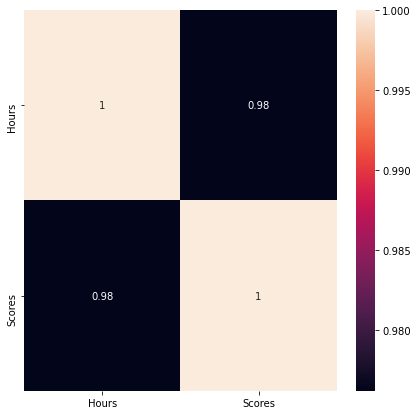

In [15]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

- Highly Postive Correalation 

# Splitting the data into train and test

In [16]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [17]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
print("x_train Shape:",x_train.shape)
print("x_test Shape:",x_test.shape)
print("y_train Shape:",y_train.shape)
print("y_test Shape:",y_test.shape)

x_train Shape: (20, 1)
x_test Shape: (5, 1)
y_train Shape: (20,)
y_test Shape: (5,)


# Using Linear Regression for Prediction the Model

In [19]:
regression = LinearRegression(fit_intercept=True)
regression.fit(x_train,y_train)

LinearRegression()

## Intercept and Coefficient

In [20]:
int = regression.intercept_
coef = regression.coef_
df = pd.DataFrame({"Intercept":int,"Coefficient":coef})
df

,Intercept,Coefficient
0,2.01816,9.910656


## Plotting the Regression Line

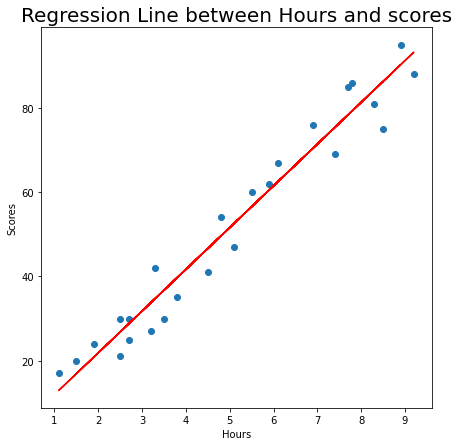

In [23]:
plt.figure(figsize=(7,7))
plt.scatter(x,y)
plt.plot(x,regression.predict(x),color="red")
plt.title("Regression Line between Hours and scores",size=20)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

## Making Prediction

In [24]:
y_pred = regression.predict(x_test)

In [25]:
Prediction = pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred})
Prediction

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


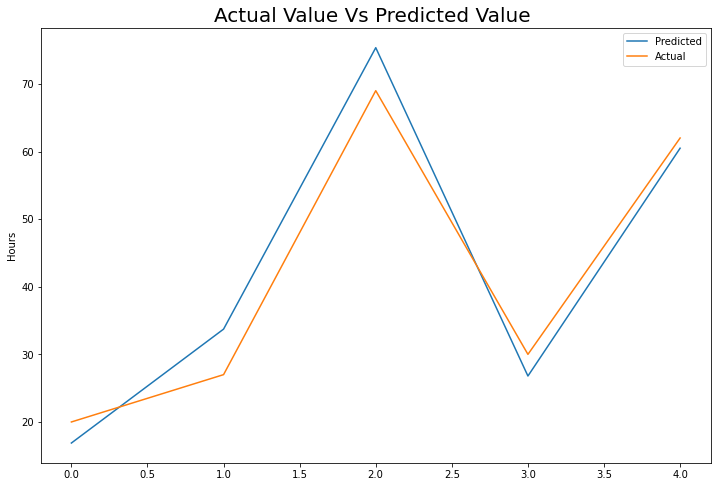

In [26]:
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.title("Actual Value Vs Predicted Value ",size=20)
plt.ylabel('Hours')

plt.legend()
plt.show()

## Traning and Testing Scores

In [27]:
print("Training_score : " , regression.score(x_train, y_train))

Training_score :  0.9515510725211552


In [28]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.9454906892105356


# Testing For New Data Points

In [29]:
Hours = np.array(9.25).reshape(-1,1)
own_pred = regression.predict(Hours)
print("Number of Hours = {}".format(Hours))
print("Prediction Scores = {}".format(own_pred[0]))

Number of Hours = [[9.25]]
Prediction Scores = 93.69173248737538


# Evaluating The Model

In [30]:
rmse = metrics.mean_squared_error(y_test,y_pred,squared=False)
print("The RMSE is :",rmse)

The RMSE is : 4.6474476121003665


In [31]:
mse = metrics.mean_absolute_error(y_test,y_pred)
print("The MSE is :",mse)

The MSE is : 4.183859899002975


# <font size=5> Thus,The student score 93.69 if the studies for 9.25 hours per day.

# <font color ="blue" size=10><center>** Thank You ** </centre></font>